<a href="https://colab.research.google.com/github/mangnez/SrutiSusarla-EDA-INCOME/blob/main/SrutiSusarla_INCOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv("/content/income.csv")
df

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,-10.000),F,Single,14-17,Grade 8 or less,Sales Worker,10+ years,Not Married,Three,Two,Family,House,White,English
8989,[10.000-15.000),M,Single,18-24,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Four,NaN,Family,House,White,English
8990,-10.000),F,Single,14-17,Grades 9 to 11,Professional/Managerial,10+ years,Not Married,Three,Two,Family,House,White,English
8991,[20.000-25.000),M,Married,55-64,1 to 3 years of college,Factory Worker/Laborer/Driver,10+ years,Yes,Three,One,Rent,Apartment,White,English


In [41]:
print(df.head(3))
print(df.tail(3))

     INCOME SEX MARITAL.STATUS    AGE                EDUCATION  \
0  [75.000-   F        Married  45-54  1 to 3 years of college   
1  [75.000-   M        Married  45-54         College graduate   
2  [75.000-   F        Married  25-34         College graduate   

                OCCUPATION       AREA DUAL.INCOMES HOUSEHOLD.SIZE UNDER18  \
0                Homemaker  10+ years           No          Three     NaN   
1                Homemaker  10+ years           No           Five     Two   
2  Professional/Managerial  10+ years          Yes          Three     One   

  HOUSEHOLDER  HOME.TYPE ETHNIC.CLASS LANGUAGE  
0         Own      House        White      NaN  
1         Own      House        White  English  
2        Rent  Apartment        White  English  
               INCOME SEX MARITAL.STATUS    AGE                EDUCATION  \
8990         -10.000)   F         Single  14-17           Grades 9 to 11   
8991  [20.000-25.000)   M        Married  55-64  1 to 3 years of college   
89

In [4]:
print(df.dtypes)

INCOME            object
SEX               object
MARITAL.STATUS    object
AGE               object
EDUCATION         object
OCCUPATION        object
AREA              object
DUAL.INCOMES      object
HOUSEHOLD.SIZE    object
UNDER18           object
HOUSEHOLDER       object
HOME.TYPE         object
ETHNIC.CLASS      object
LANGUAGE          object
dtype: object


In [42]:
print(df.describe(include='all'))  # include='all' gives statistics for all types of data

# Check for missing values
print(pd.isna(df).any())

          INCOME   SEX MARITAL.STATUS    AGE                EDUCATION  \
count       8993  8993           8833   8993                     8907   
unique         9     2              5      7                        6   
top     -10.000)     F         Single  25-34  1 to 3 years of college   
freq        1745  4918           3654   2249                     3066   

                     OCCUPATION       AREA DUAL.INCOMES HOUSEHOLD.SIZE  \
count                      8857       8080         8993           8618   
unique                        9          5            3              9   
top     Professional/Managerial  10+ years  Not Married            Two   
freq                       2820       5182         5438           2664   

       UNDER18 HOUSEHOLDER HOME.TYPE ETHNIC.CLASS LANGUAGE  
count     3269        8753      8636         8925     8634  
unique       9           3         5            8        3  
top        One        Rent     House        White  English  
freq      1506     

In [43]:
import pandas as pd

# Display the value counts of the INCOME column to understand the distribution
print(df['INCOME'].value_counts())

# Convert INCOME to numeric, coercing invalid strings (like '?') into NaN
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')

# Calculate the mean of the INCOME column, excluding NaN values
income_mean = df['INCOME'].mean()

# Replace NaN values (including where '?' was originally) with the mean income
df['INCOME'].fillna(income_mean, inplace=True)

# Display the first 10 rows of the cleaned INCOME column
print(df['INCOME'].head(10))


INCOME
-10.000)           1745
[50.000-75.000)    1308
[30.000-40.000)    1110
[40.000-50.000)     969
[75.000-            884
[20.000-25.000)     813
[10.000-15.000)     775
[25.000-30.000)     722
[15.000-20.000)     667
Name: count, dtype: int64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: INCOME, dtype: float64


<ipython-input-43-b6dc4664bf88>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INCOME'].fillna(income_mean, inplace=True)


##Univariate Analysis

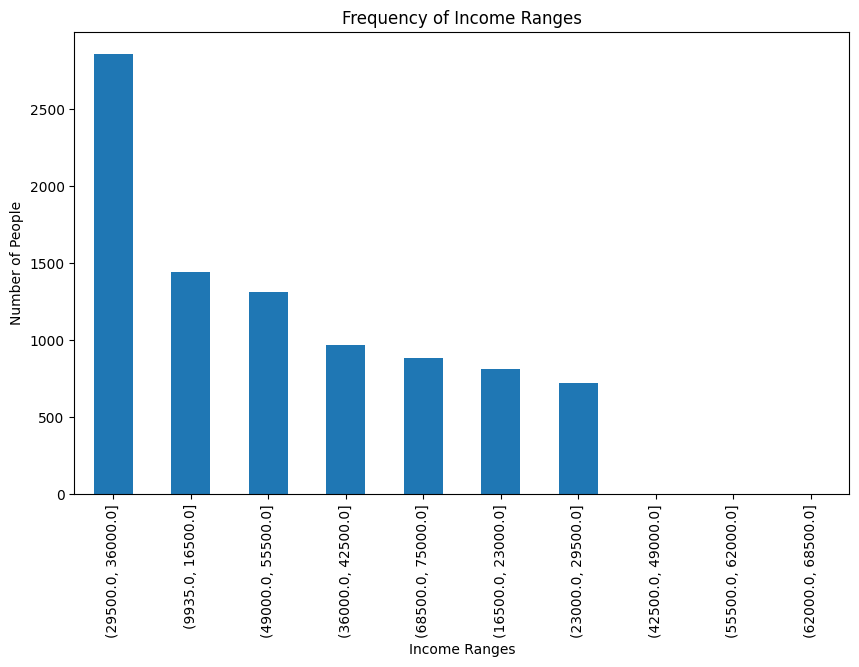

In [ ]:
income_bins = pd.cut(df['INCOME'], bins=10)  # Divide the income column into 10 equal-sized bins

# Plot the frequency of income ranges
income_bins.value_counts().nlargest(10).plot(kind='bar', figsize=(10,6))

# Add titles and labels
plt.title("Frequency of Income Ranges")
plt.ylabel('Number of People')
plt.xlabel('Income Ranges')
plt.show()

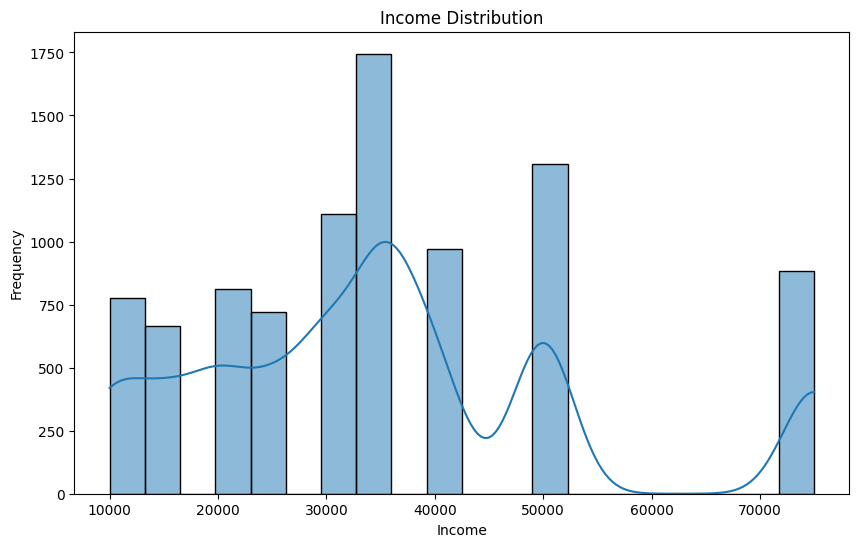

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of income
plt.figure(figsize=(10, 6))
sns.histplot(df['INCOME'], kde=True, bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check for non-numeric values in the 'INCOME' column
print(df['INCOME'].apply(type).value_counts())

# If there are non-numeric values, investigate further and clean the data
# For example, you might need to identify and handle specific string values

# Convert 'INCOME' back to numeric if necessary
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')

# Calculate mean, median, and mode
mean_income = df["INCOME"].mean()
median_income = df["INCOME"].median()
mode_income = df["INCOME"].mode()[0]

print("Mean Income:", mean_income)
print("Median Income:", median_income)
print("Mode Income:", mode_income)

INCOME
<class 'str'>    8993
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


KeyError: 0

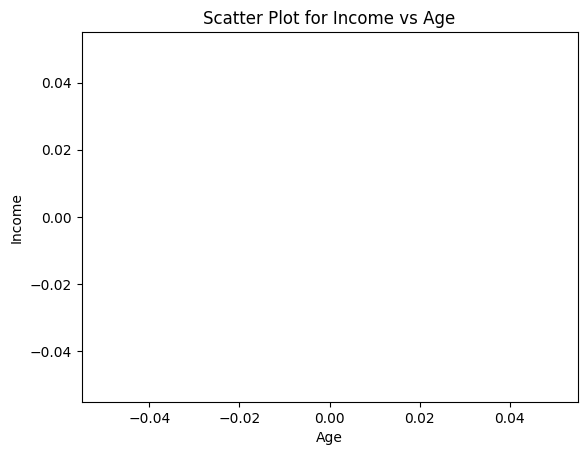

In [ ]:
plt.scatter(df["AGE"], df["INCOME"])
plt.title("Scatter Plot for Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

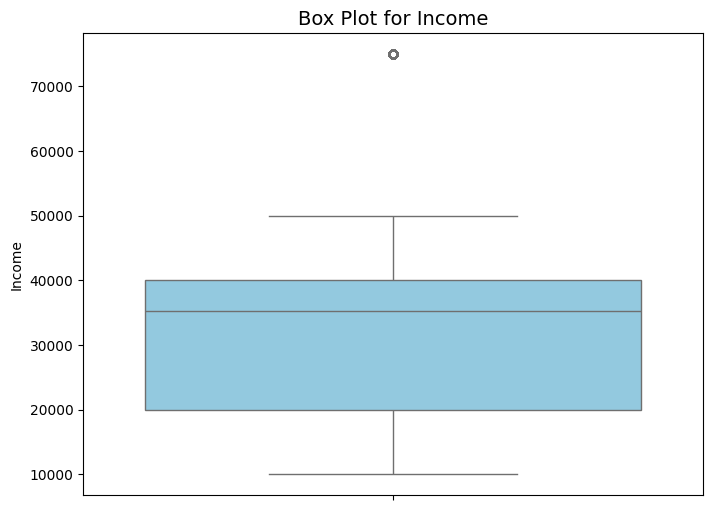

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['INCOME'], color='skyblue')
plt.title('Box Plot for Income', fontsize=14)
plt.ylabel('Income')
plt.show()

In [44]:
import numpy as np

# Define a helper function to convert age ranges to the midpoint
def convert_age_to_numeric(age):
    if '-' in age:
        age_range = age.split('-')
        # Calculate the midpoint of the range
        return (int(age_range[0]) + int(age_range[1])) // 2
    elif age.isnumeric():  # In case of single numeric values, convert directly
        return int(age)
    else:
        return np.nan  # Handle unexpected formats by returning NaN

# Apply the function to the 'AGE' column
df['AGE'] = df['AGE'].apply(convert_age_to_numeric)

# Calculate the mean of the valid numeric values for 'AGE'
age_mean = df['AGE'].mean()

# Replace any remaining NaN values with the mean age (if any)
df['AGE'].fillna(age_mean, inplace=True)

# Now the 'AGE' column should contain numeric values suitable for analysis
# Display the first few rows to verify
print(df['AGE'].head(10))

# Convert the 'AGE' column to integers for simplicity, if needed
df['AGE'] = df['AGE'].astype(int)


0    49.000000
1    49.000000
2    29.000000
3    15.000000
4    15.000000
5    59.000000
6    21.000000
7    29.000000
8    59.000000
9    31.901221
Name: AGE, dtype: float64


<ipython-input-44-4381b06da1e8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGE'].fillna(age_mean, inplace=True)


In [ ]:
df.head(5)

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [ ]:
print(df['AGE'].isnull().sum())

0


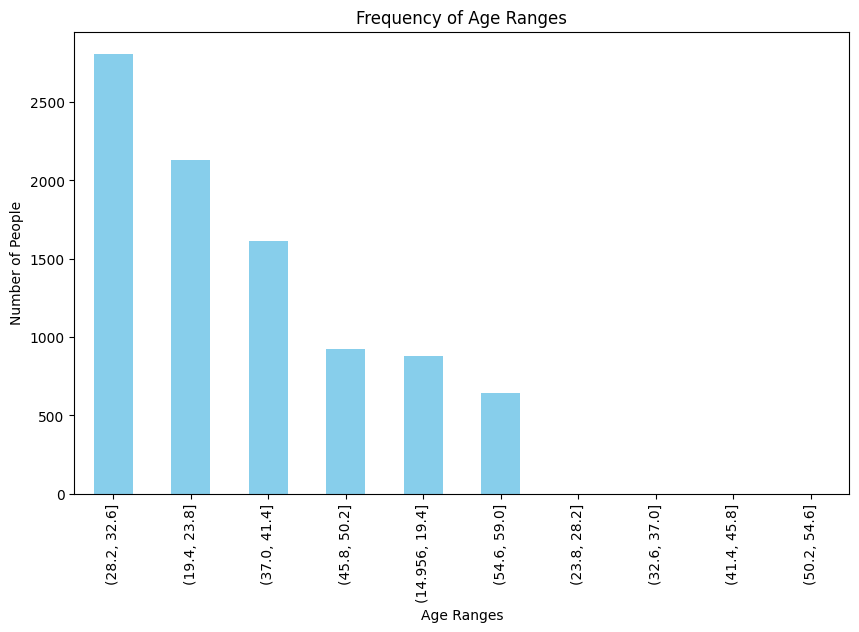

In [ ]:
age_bins = pd.cut(df['AGE'], bins=10)
age_bins.value_counts().nlargest(10).plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title("Frequency of Age Ranges")
plt.ylabel('Number of People')
plt.xlabel('Age Ranges')
plt.show()

In [ ]:
mean_age = df["AGE"].mean()
median_age = df["AGE"].median()
mode_age = df["AGE"].mode()[0]

print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Mode Age:", mode_age)

Mean Age: 31.84510174580229
Median Age: 29.0
Mode Age: 29


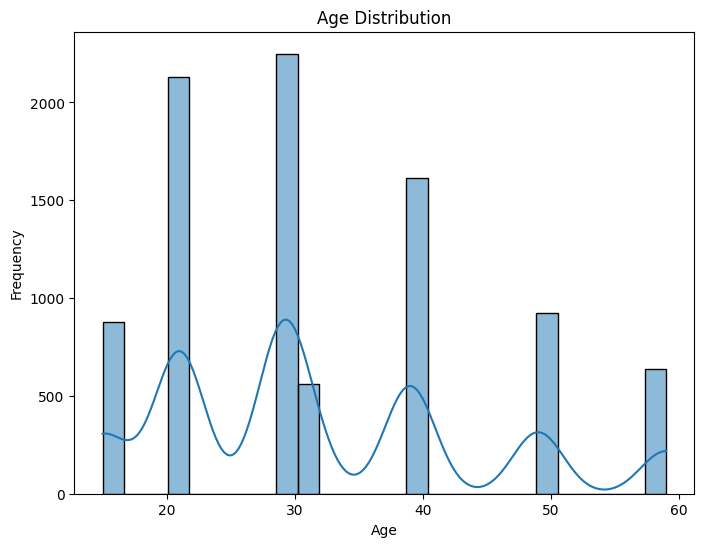

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of income
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

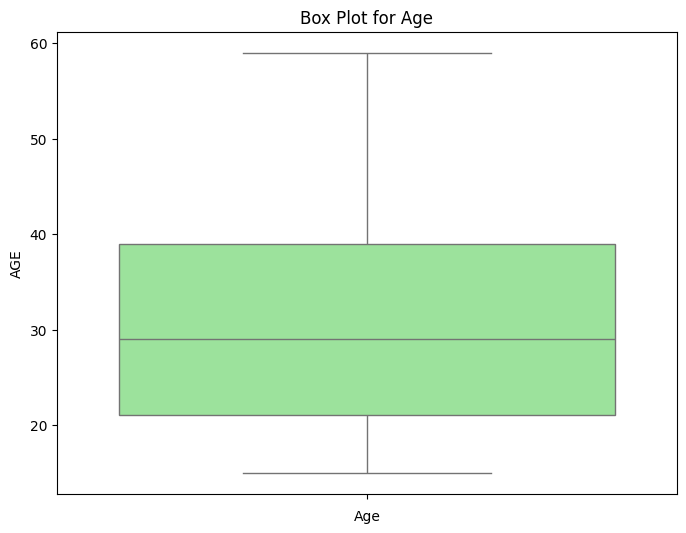

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df['AGE'], color='lightgreen')
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

In [ ]:
unique_values = df['HOUSEHOLD.SIZE'].unique()
print("Unique values in HOUSEHOLD.SIZE:", unique_values)

Unique values in HOUSEHOLD.SIZE: ['Three' 'Five' 'Four' 'Two' 'One' 'Six' nan 'Seven' 'Eight'
 'Nine or more']


In [ ]:
data = {'HOUSEHOLD.SIZE': ['Three', 'Five', 'Four', 'Two', 'One', 'Six', None, 'Seven', 'Eight', 'Nine or more']}
dfh = pd.DataFrame(data)
household_size_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
    'Six': 6,
    'Seven': 7,
    'Eight': 8,
    'Nine or more': 9,
}
# Apply the mapping to convert the string values to numeric values
dfh['HOUSEHOLD.SIZE'] = dfh['HOUSEHOLD.SIZE'].map(household_size_mapping)

print("After mapping:\n", dfh['HOUSEHOLD.SIZE'])

After mapping:
 0    3.0
1    5.0
2    4.0
3    2.0
4    1.0
5    6.0
6    NaN
7    7.0
8    8.0
9    9.0
Name: HOUSEHOLD.SIZE, dtype: float64


In [ ]:
#Null value analysis
null_values = df['HOUSEHOLD.SIZE'].isnull().sum()
print(f"Number of null values in HOUSEHOLD.SIZE: {null_values}")

In [ ]:
# Fill null values with the mean or other appropriate value if necessary
df['HOUSEHOLD.SIZE'].fillna(df['HOUSEHOLD.SIZE'].mean(), inplace=True)

In [ ]:
# Plot a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['HOUSEHOLD.SIZE'], kde=False, bins=6, color='skyblue')
plt.title('Distribution of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['HOUSEHOLD.SIZE'], color='lightgreen')
plt.title('Box Plot of Household Size')
plt.xlabel('Household Size')
plt.show()

##Bivariate Analysis

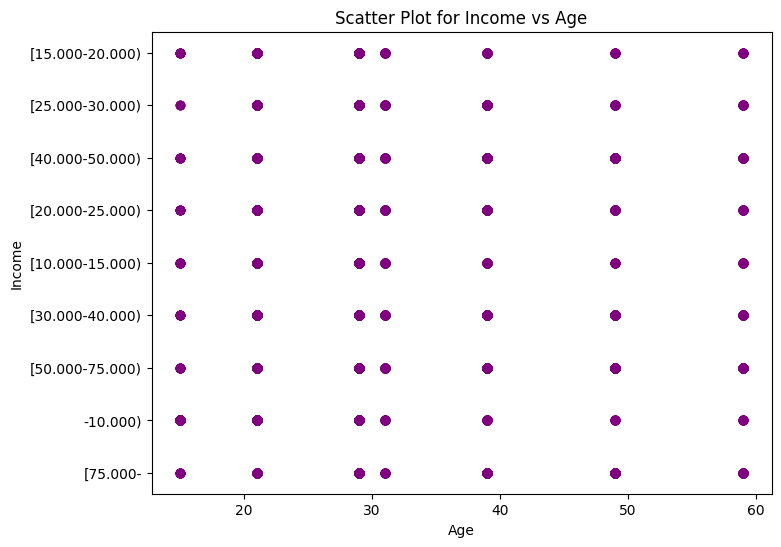

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['AGE'], df['INCOME'], color='purple')
plt.title("Scatter Plot for Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

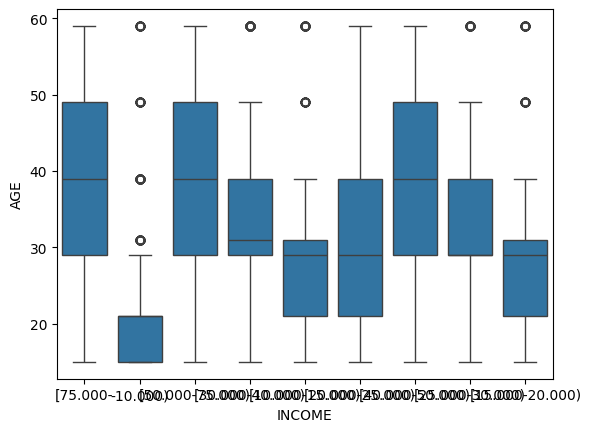

In [ ]:
sns.boxplot(x="INCOME",y="AGE",data=df)
plt.show()

##Multivariate Analysis

In [ ]:
sns.pairplot(df,vars = ['AGE', 'INCOME','HOUSEHOLD.SIZE'], kind="reg")
plt.show()

##Time series Analysis

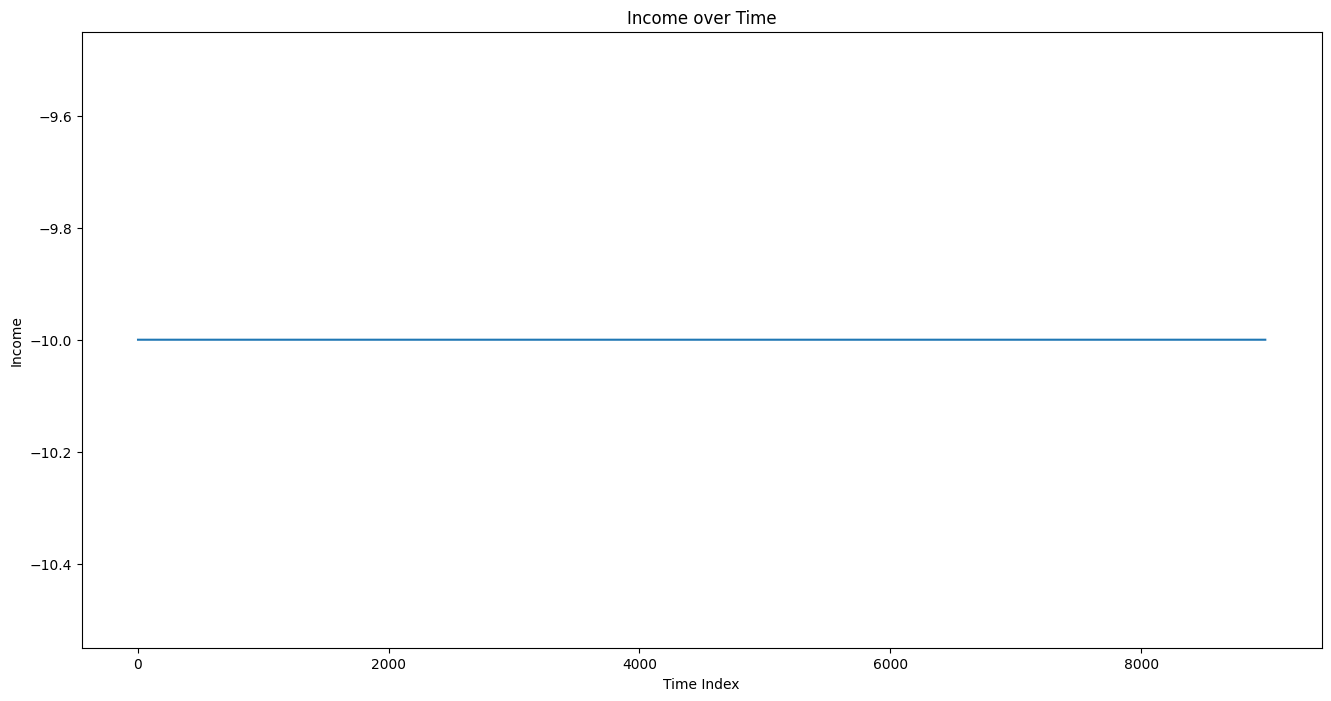

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/income.csv")

# Preprocess the 'INCOME' column to use in numeric form
data['INCOME'] = data['INCOME'].str.replace('[\[\])]', '', regex=True)  # Remove brackets
data['INCOME'] = pd.to_numeric(data['INCOME'], errors='coerce')  # Convert income to numeric, coercing errors to NaN

# Generate a time index (assuming row order represents time sequence)
data['Time_Index'] = np.arange(len(data))

# Drop rows where income data is missing
data = data.dropna(subset=['INCOME'])

# Plot the income over time using seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(x='Time_Index', y='INCOME', data=data)
plt.title('Income over Time')
plt.xlabel('Time Index')
plt.ylabel('Income')
plt.show()


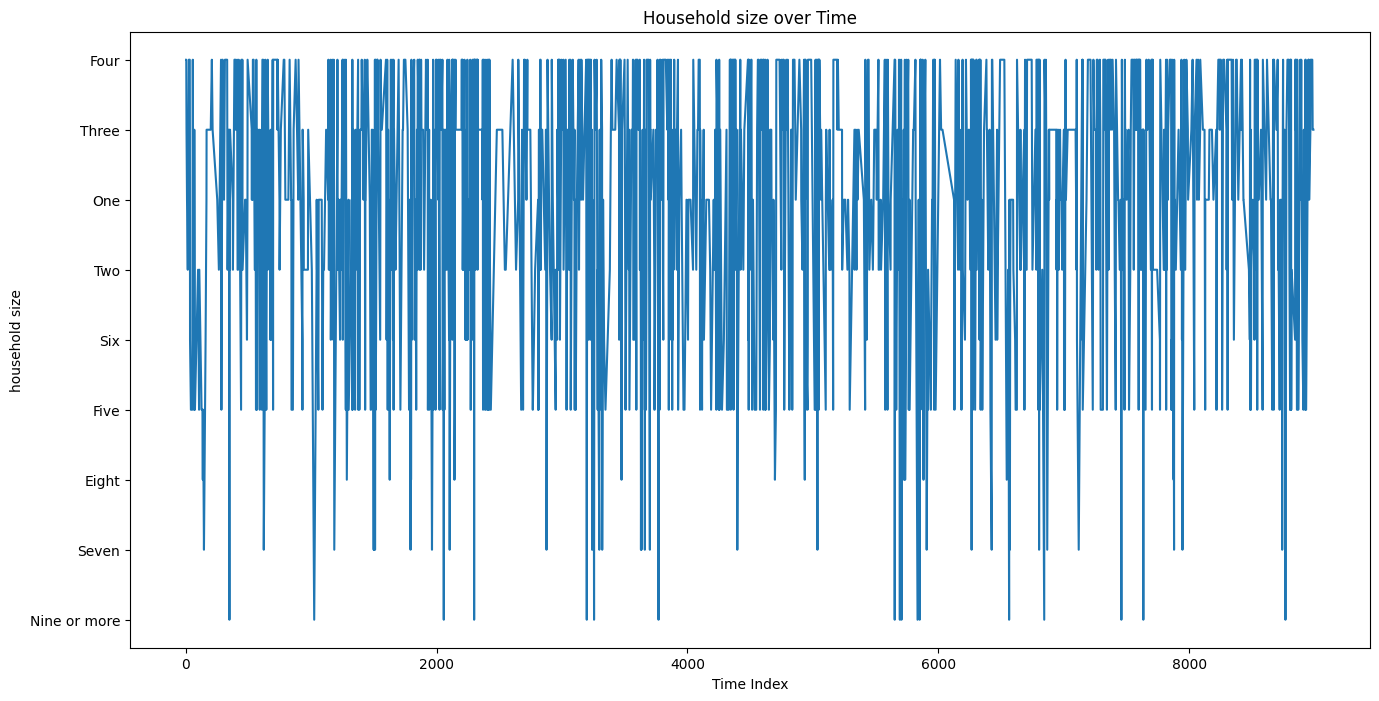

In [14]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Time_Index', y='HOUSEHOLD.SIZE', data=data)
plt.title('Household size over Time')
plt.xlabel('Time Index')
plt.ylabel('household size')
plt.show()

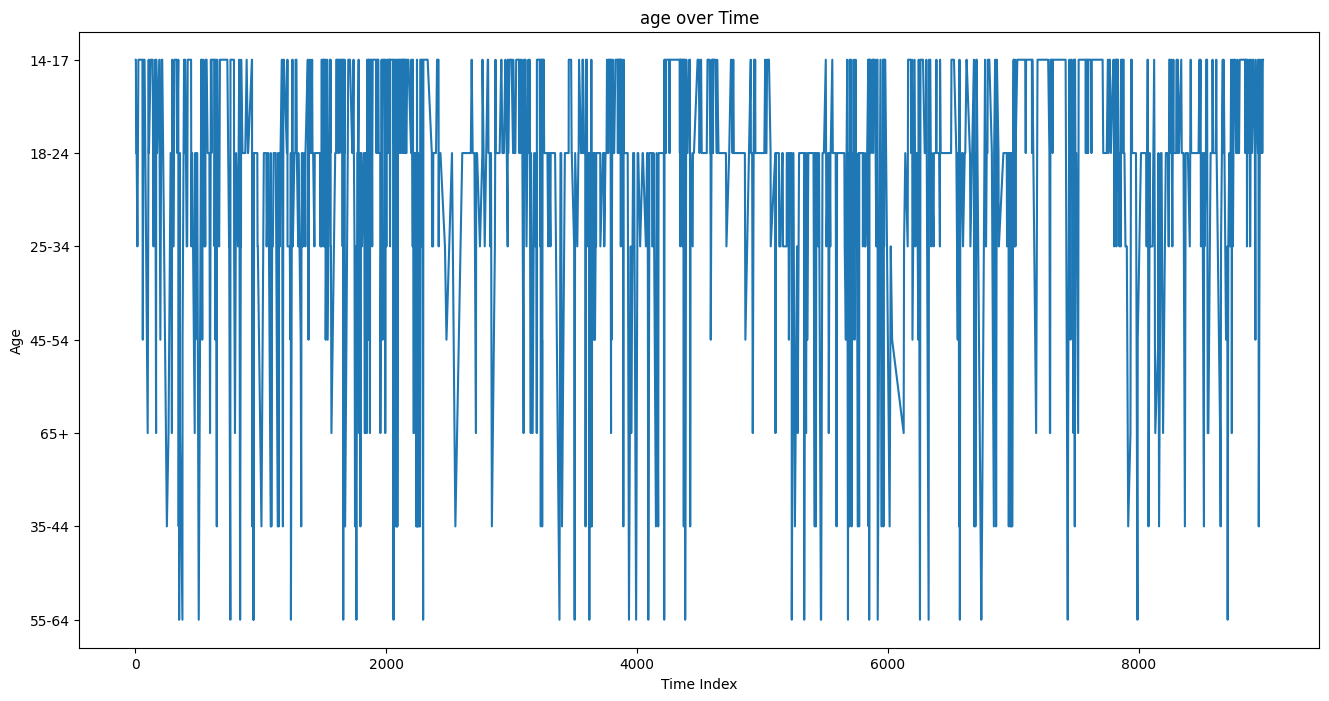

In [15]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Time_Index', y='AGE', data=data)
plt.title('age over Time')
plt.xlabel('Time Index')
plt.ylabel('Age')
plt.show()

KeyError: '2016'

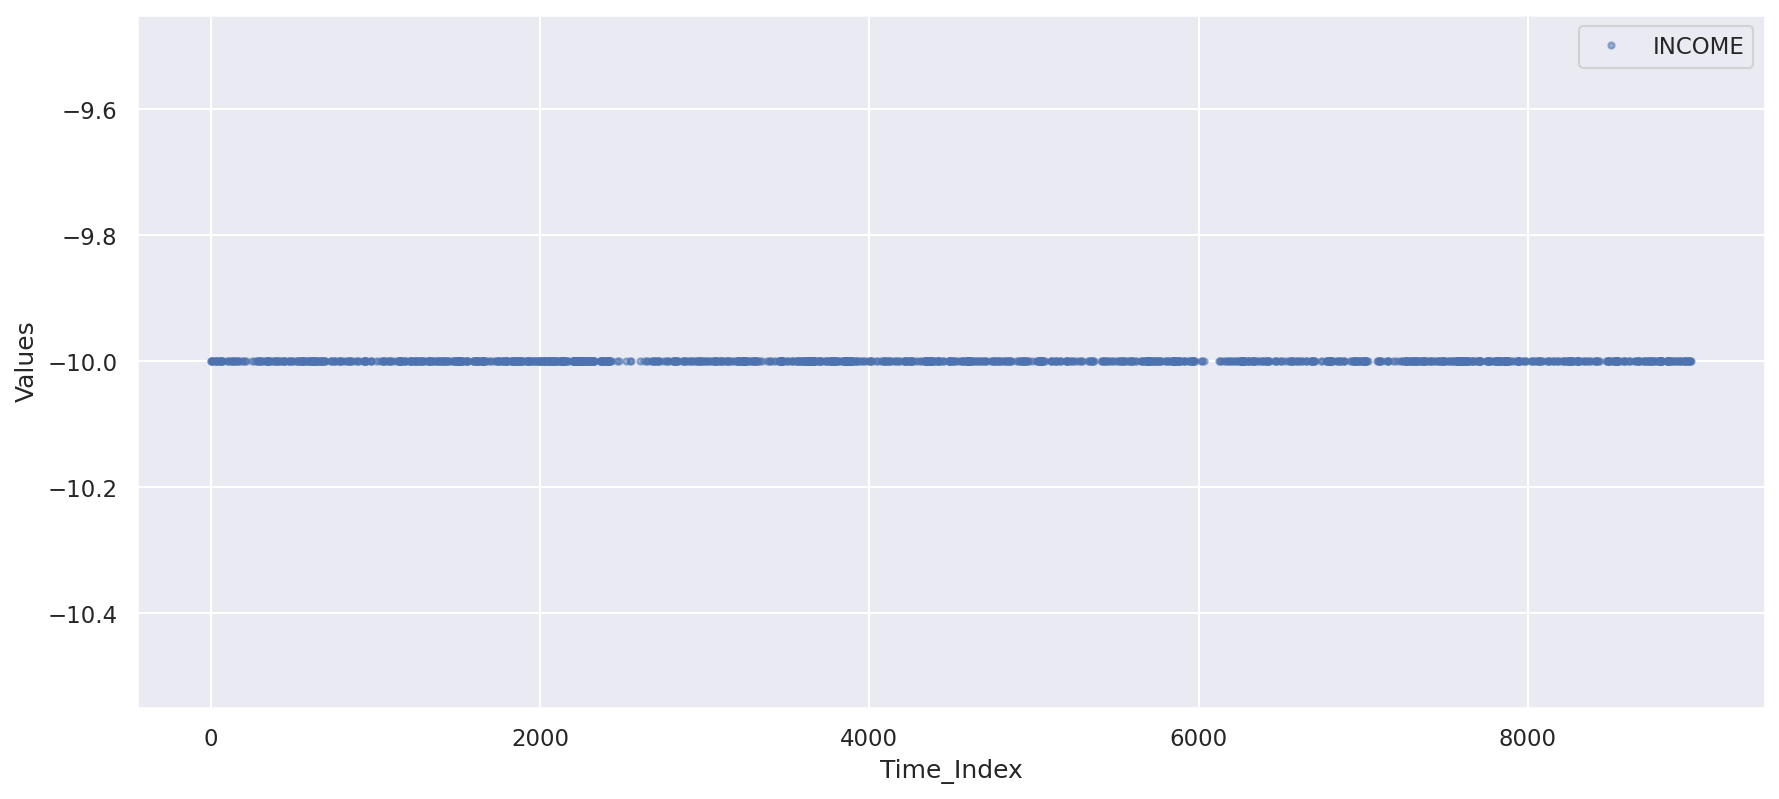

In [20]:
# Plot the data for 'HOUSEHOLD.SIZE'
cols_to_plot = ['HOUSEHOLD.SIZE', 'INCOME']  # Replace 'INCOME' with the relevant column name
axes = data[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 6), subplots=True)

# Set labels for the axes
for ax in axes:
    ax.set_ylabel('Values')

# Further investigation for a particular year, e.g., 2016
ax = data.loc['2016', 'HOUSEHOLD.SIZE'].plot()
ax.set_ylabel('Daily Household Size')

# Investigate the month of December 2016
ax = data.loc['2016-12', 'HOUSEHOLD.SIZE'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Household Size')

# Investigate a specific week in December 2016, e.g., 23rd to 30th
ax = data.loc['2016-12-23':'2016-12-30', 'HOUSEHOLD.SIZE'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Household Size')

plt.show()


##K Means Clustering

In [50]:
data = pd.read_csv("/content/income.csv")
X = data.iloc[:, [1, 4]].values

In [52]:
import numpy as np

# Define a helper function to convert age ranges to the midpoint
def convert_age_to_numeric(age):
    if '-' in age:
        age_range = age.split('-')
        # Calculate the midpoint of the range
        return (int(age_range[0]) + int(age_range[1])) // 2
    elif age.isnumeric():  # In case of single numeric values, convert directly
        return int(age)
    else:
        return np.nan  # Handle unexpected formats by returning NaN

# Apply the function to the 'AGE' column
df['AGE'] = df['AGE'].apply(convert_age_to_numeric)

# Calculate the mean of the valid numeric values for 'AGE'
age_mean = df['AGE'].mean()

# Replace any remaining NaN values with the mean age (if any)
df['AGE'].fillna(age_mean, inplace=True)

# Now the 'AGE' column should contain numeric values suitable for analysis
# Display the first few rows to verify
print(df['AGE'].head(10))

# Convert the 'AGE' column to integers for simplicity, if needed
df['AGE'] = df['AGE'].astype(int)


TypeError: argument of type 'float' is not iterable

<ipython-input-56-25b4e53eecd1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HOUSEHOLD.SIZE'].fillna(df['HOUSEHOLD.SIZE'].median(), inplace=True)
<ipython-input-56-25b4e53eecd1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

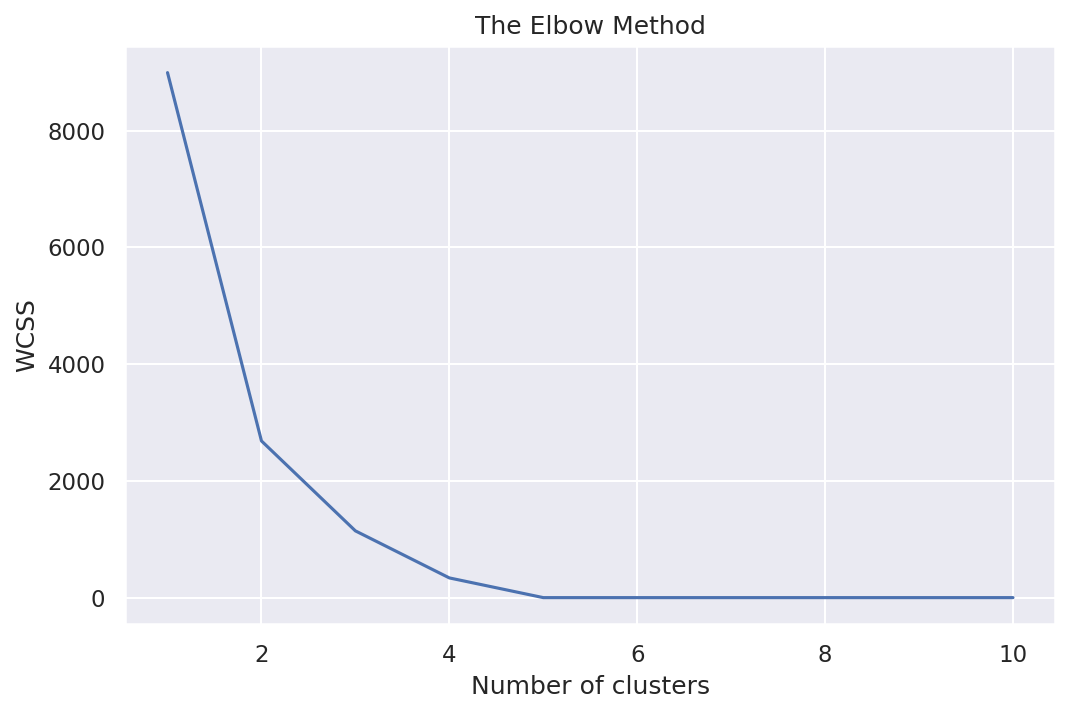

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Fill missing values in 'HOUSEHOLD.SIZE' and 'INCOME' with the median of each column
df['HOUSEHOLD.SIZE'].fillna(df['HOUSEHOLD.SIZE'].median(), inplace=True)
df['INCOME'].fillna(df['INCOME'].median(), inplace=True)

# Define X to include only 'HOUSEHOLD.SIZE' and 'INCOME'
X = df[['HOUSEHOLD.SIZE', 'INCOME']].values
X = np.nan_to_num(X, nan=np.nanmedian(X))
# Using the Elbow Method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [58]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

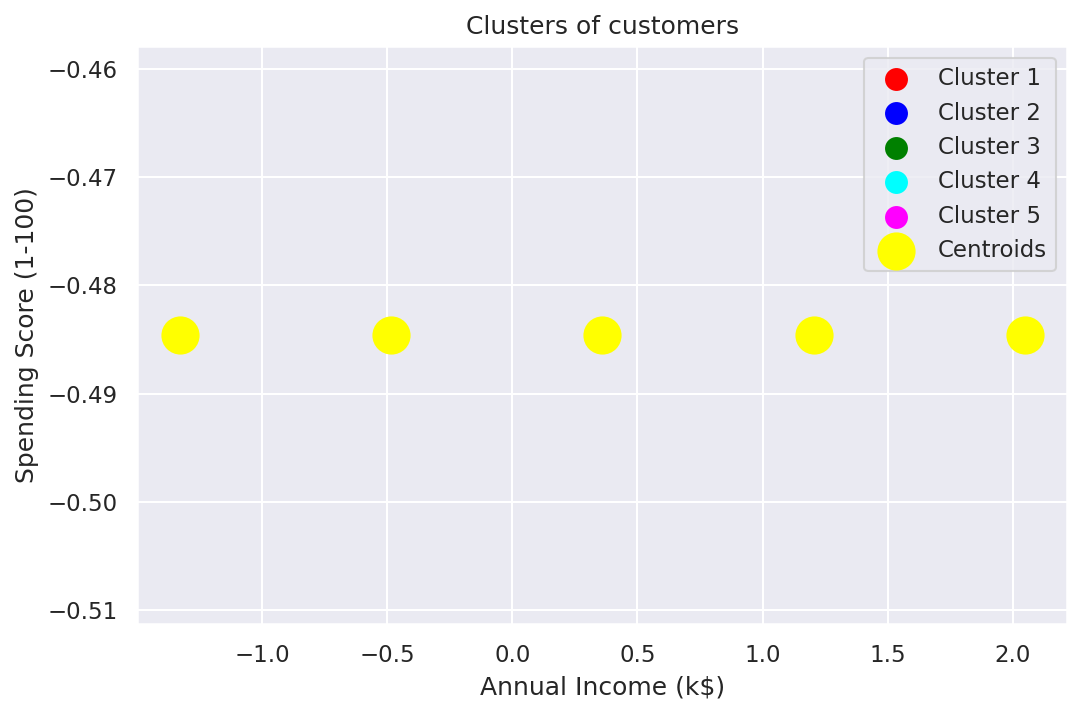

In [59]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

RecursionError: maximum recursion depth exceeded in __instancecheck__

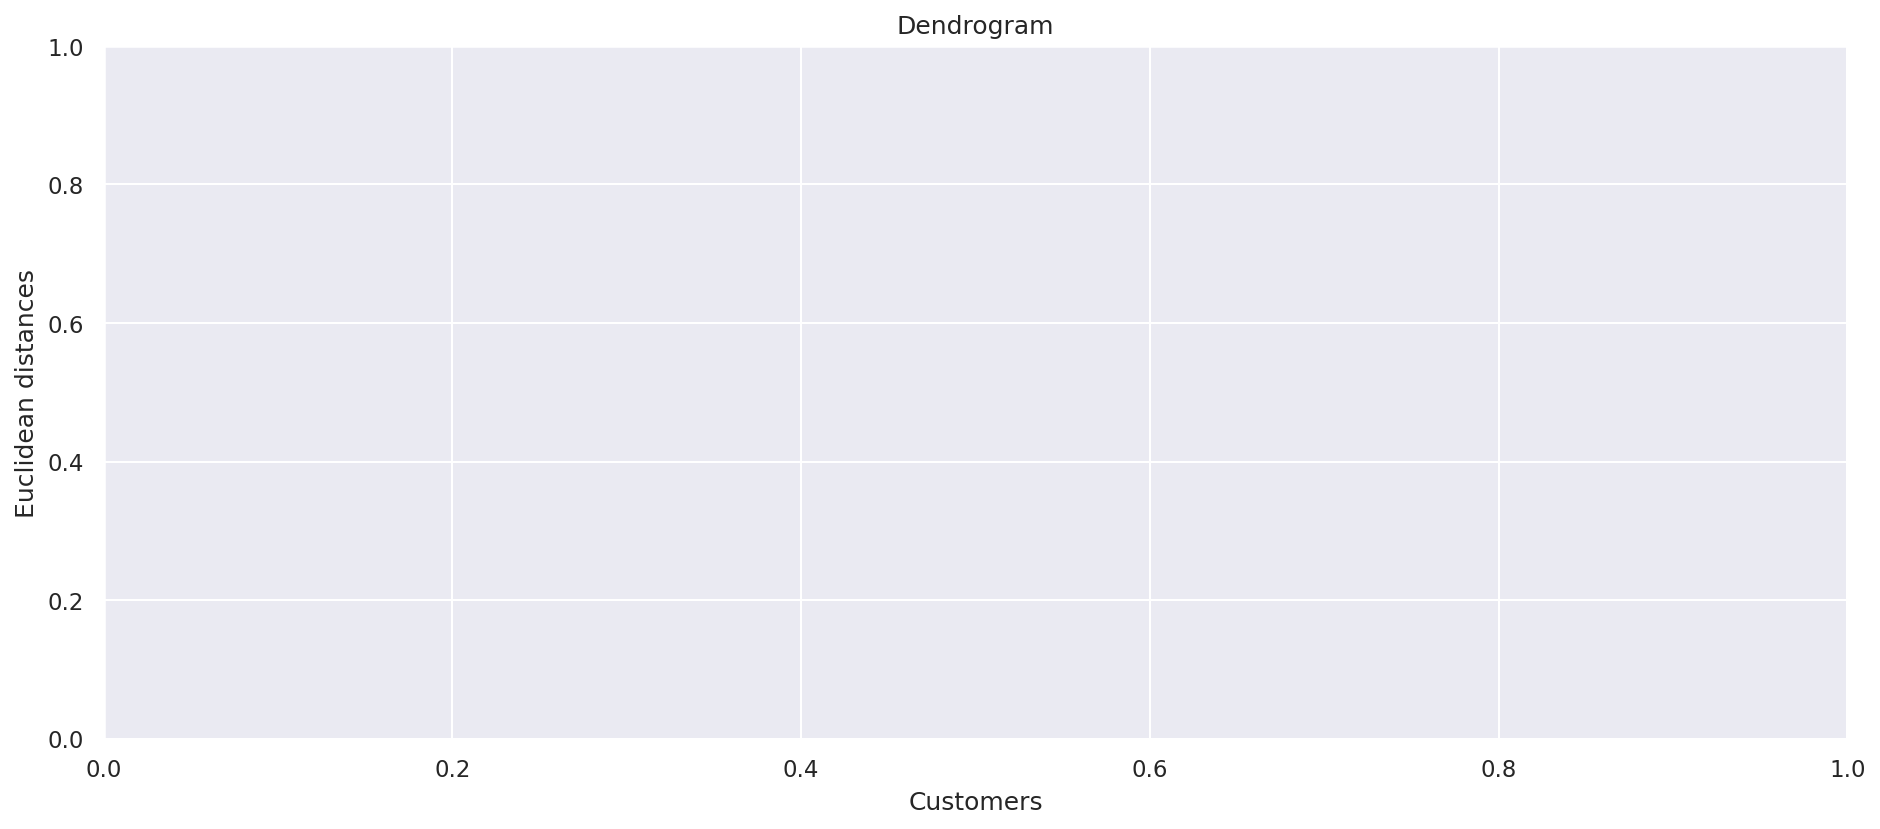

In [62]:
import sys
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


# Increase the recursion limit (use with caution!)
sys.setrecursionlimit(100)

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()